Importação das bibliotecas e base de dados

In [6]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
credicard_df = pd.read_csv("Marketing_data.csv")
credicard_df.shape

(8950, 18)

In [8]:
credicard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
credicard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
credicard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
credicard_df[credicard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [13]:
credicard_df['CASH_ADVANCE'].max()

47137.21176

Visualização e exploração dos dados 

<AxesSubplot:>

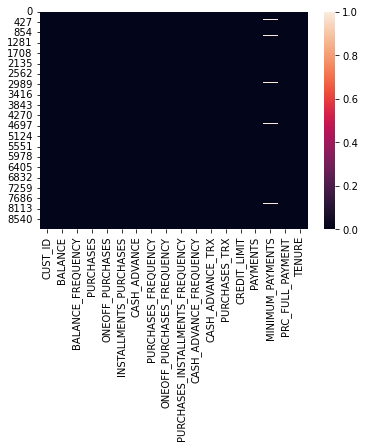

In [15]:
# Verificando a existência de valores nulos
sns.heatmap(credicard_df.isnull())

In [18]:
# Verificando a quantidade de campos vazios
credicard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
# Verificando a média dos pagamentos minimoss
credicard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [21]:
# Inserindo o valor médio nos campos[MINIMUM_PAYMENTS] que estavam nulos
credicard_df.loc[(credicard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credicard_df['MINIMUM_PAYMENTS'].mean()

In [23]:
# Verificando o valor da média do campo
credicard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [24]:
# Inserindo o valor médio nos campos[CREDIT_LIMIT] que estavam nulos
credicard_df.loc[(credicard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credicard_df['CREDIT_LIMIT'].mean()

In [25]:
# Certificando que não existe mais valores nulos
credicard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

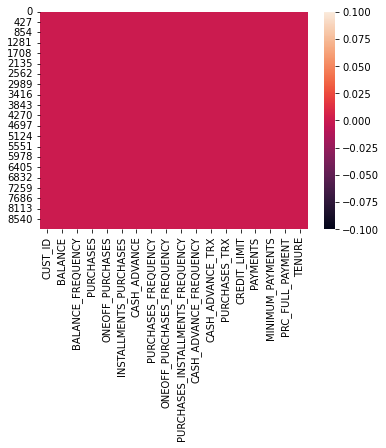

In [26]:
# Verificando a existência de valores nulos
sns.heatmap(credicard_df.isnull())

In [28]:
# Verificando valores duplicados
credicard_df.duplicated().sum()

0

In [30]:
# Apagando um coluna
# axis = Significado que é a coluna inteira
credicard_df.drop('CUST_ID', axis=1, inplace=True)

In [31]:
credicard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Visualização de dados

In [32]:
# Verificando as colunas existentes
credicard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [33]:
# Verificando a quantidade de colunas
print('Quantidade de colunas: ', len(credicard_df.columns))

Quantidade de colunas:  17


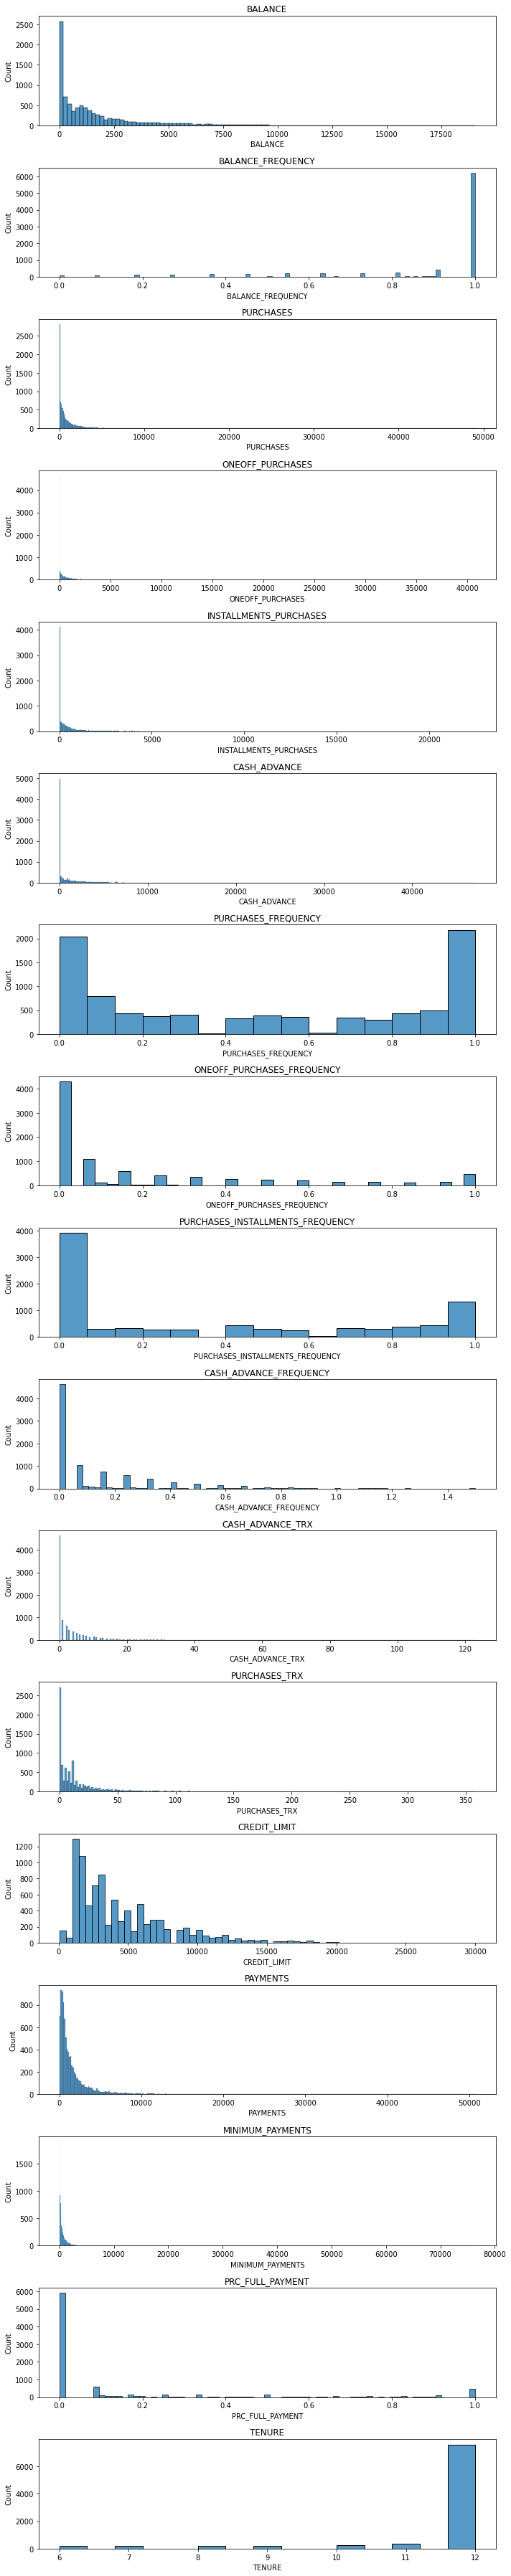

In [43]:
# Histograma para cada coluna
# kde =  Serve para colocar as linhas
plt.figure(figsize=(10,50))
for i in range(len(credicard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(credicard_df[credicard_df.columns[i]])
    plt.title(credicard_df.columns[i])
plt.tight_layout();

In [45]:
correlations = credicard_df.corr()


<AxesSubplot:>

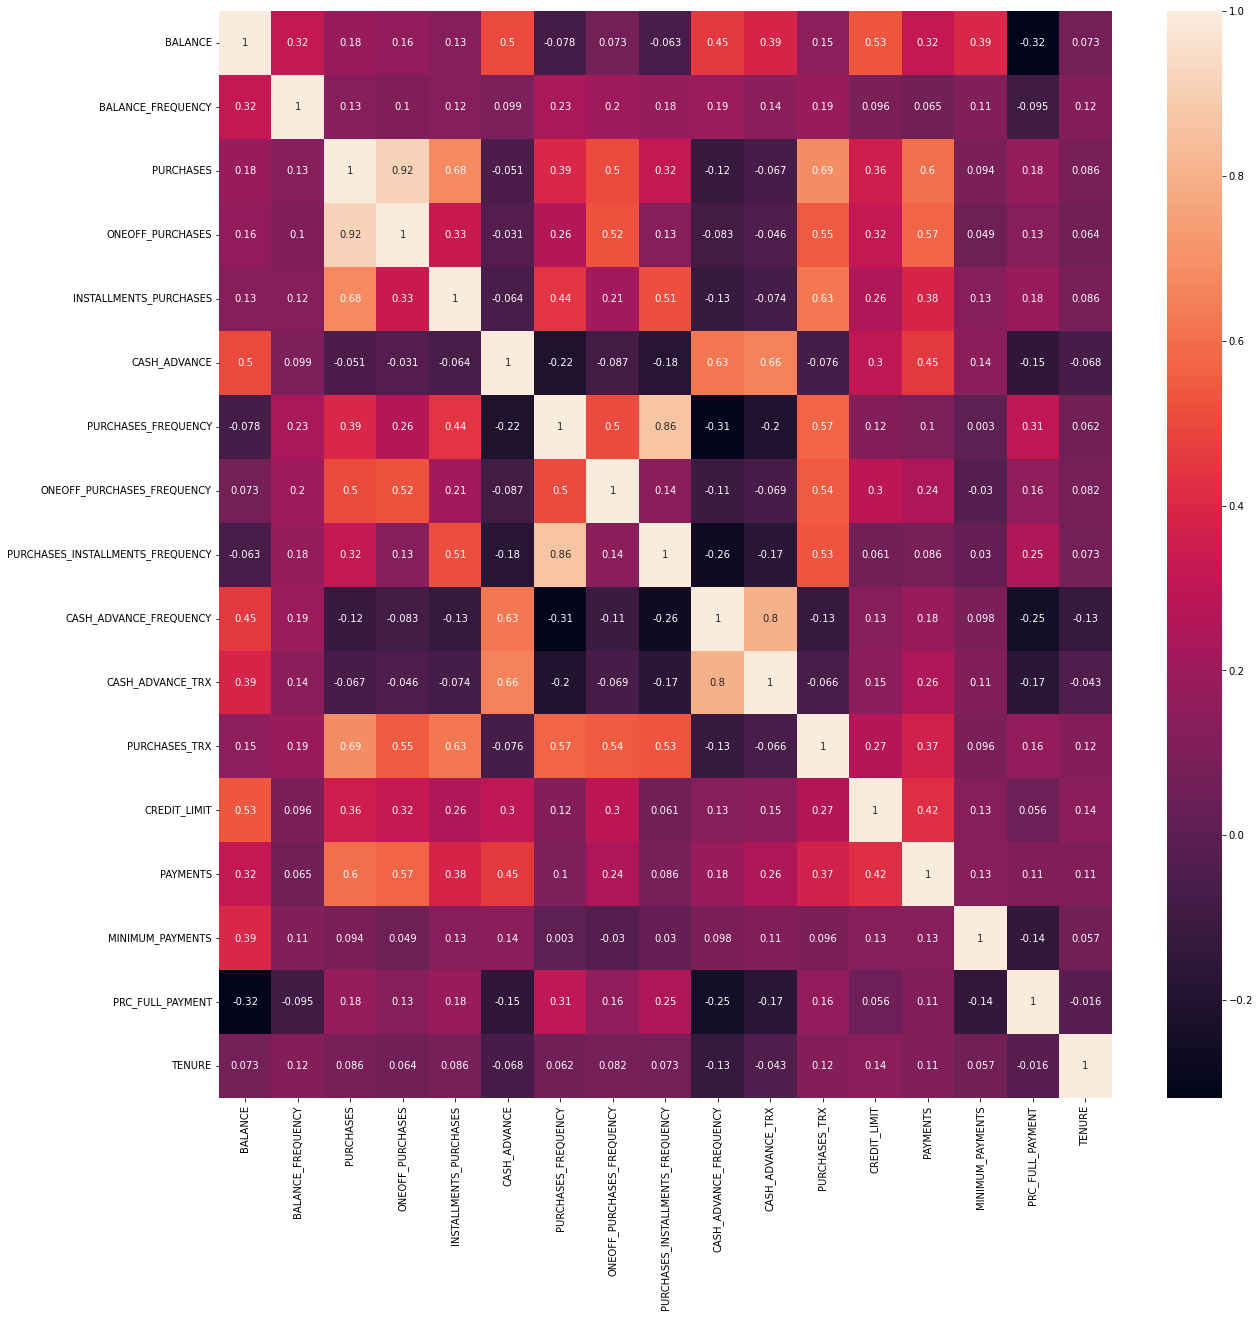

In [46]:
# Gerando um mapa de calor
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

Obtenção de número de clusters

Agrupamento de K-means

In [51]:
# Verificando o minimo e o máximo
min(credicard_df['BALANCE']), max(credicard_df['BALANCE'])

(0.0, 19043.13856)

In [50]:
# Colocandos os dados na mesma escala
scaler = StandardScaler()
credicard_df_scaled = scaler.fit_transform(credicard_df)
credicard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [53]:
# Verificando o min e o max, na mesma escala
min(credicard_df_scaled[0]), max(credicard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [54]:
wcss_1 = []
range_values  = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(credicard_df_scaled)
    wcss_1.append(kmeans.inertia_)
    
print(wcss_1)


[152149.99999999878, 127784.80276269239, 111986.6980661014, 99073.93826774784, 91502.59831527053, 84852.45856368191, 79544.70251442838, 75105.04108532802, 69858.25798868178, 66455.19401260189, 63632.75989251365, 61353.75226585836, 59141.925657180094, 57492.75170420133, 55853.72593981186, 54268.38430430096, 53346.47713496669, 51763.68922254352, 50708.3972420715]


Text(0, 0.5, 'WCSS')

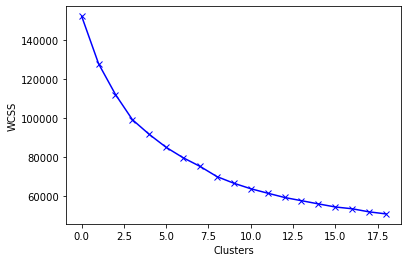

In [56]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Agrupamento de k-means

In [57]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(credicard_df_scaled)
labels = kmeans.labels_

In [59]:
labels, len(labels)

(array([1, 0, 3, ..., 2, 2, 2]), 8950)

In [60]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 890, 2753,  626, 1121,  343,   23, 2010, 1184], dtype=int64))

In [61]:
kmeans.cluster_centers_

array([[ 1.65995804e+00,  3.95982346e-01, -2.22661532e-01,
        -1.58190091e-01, -2.35923526e-01,  1.98523432e+00,
        -4.86045445e-01, -2.12640300e-01, -4.25567829e-01,
         1.91347399e+00,  1.91011382e+00, -2.72383631e-01,
         1.00549924e+00,  7.89543407e-01,  5.14651608e-01,
        -3.95747493e-01,  7.46983498e-02],
       [ 5.75557287e-03,  4.03221017e-01, -3.55081156e-01,
        -2.39783789e-01, -3.98949123e-01, -1.04108694e-01,
        -8.44399174e-01, -3.87375722e-01, -7.51493127e-01,
         8.68076864e-02, -3.98166306e-02, -4.78864592e-01,
        -3.09057079e-01, -2.53487038e-01, -1.29359678e-02,
        -4.55277821e-01,  2.74062561e-01],
       [-3.34729677e-01, -3.45333454e-01, -2.86418549e-01,
        -2.12137124e-01, -2.87136991e-01,  6.73917549e-02,
        -2.01162153e-01, -2.81559090e-01, -2.25456446e-01,
         3.09205323e-01,  5.23038048e-04, -3.85819264e-01,
        -5.63832996e-01, -3.91093799e-01, -2.09242398e-01,
         1.27483622e-02, -3.1

In [63]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [credicard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.659958,0.395982,-0.222662,-0.158190,-0.235924,1.985234,-0.486045,-0.212640,-0.425568,1.913474,1.910114,-0.272384,1.005499,0.789543,0.514652,-0.395747,0.074698
1,0.005756,0.403221,-0.355081,-0.239784,-0.398949,-0.104109,-0.844399,-0.387376,-0.751493,0.086808,-0.039817,-0.478865,-0.309057,-0.253487,-0.012936,-0.455278,0.274063
2,-0.334730,-0.345333,-0.286419,-0.212137,-0.287137,0.067392,-0.201162,-0.281559,-0.225456,0.309205,0.000523,-0.385819,-0.563833,-0.391094,-0.209242,0.012748,-3.195281
3,-0.128791,0.402630,0.554261,0.677459,0.065735,-0.331794,0.993139,1.911467,0.201414,-0.414626,-0.332018,0.646941,0.451877,0.157090,-0.157888,0.451255,0.271357
4,1.080697,0.472100,2.552636,1.853780,2.630028,-0.134947,1.161123,1.555059,1.262484,-0.276042,-0.138140,3.150772,1.324269,1.495257,0.688108,0.256485,0.336716
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,-0.360593,0.332299,-0.032275,-0.241678,0.367499,-0.361775,0.996841,-0.384262,1.209109,-0.472663,-0.359497,0.192394,-0.259206,-0.213756,-0.035731,0.317120,0.256586
7,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376


In [68]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credicard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.174935e+10,1.139582,2.409954e+09,9.097610e+08,1.620589e+08,2.261454e+10,0.734715,0.275227,0.540122,0.182933,783.773021,5285.566230,1.079442e+11,3.368436e+10,1.120939e+10,0.201921,47.736171
1,6.832918e+09,1.139678,1.118526e+09,5.366654e+08,4.150663e+07,3.346654e+09,0.711548,0.270588,0.519663,0.168295,164.065366,2114.630929,4.462814e+10,8.379809e+09,4.531822e+09,0.200432,48.213992
2,3.762661e+09,1.129727,1.788161e+09,6.630827e+08,1.241882e+08,4.928228e+09,0.753133,0.273397,0.552683,0.170077,176.885722,3543.531263,3.235677e+10,5.041386e+09,2.047212e+09,0.212142,39.898940
3,5.619667e+09,1.139670,9.986925e+09,4.730851e+09,3.851260e+08,1.246947e+09,0.830344,0.331619,0.579479,0.164277,71.200950,19403.666229,8.127876e+10,1.834065e+10,2.697194e+09,0.223114,48.207508
4,1.652598e+10,1.140594,2.947618e+10,1.010970e+10,2.281340e+09,3.062264e+09,0.841204,0.322157,0.646085,0.165388,132.817188,57855.084863,1.232978e+11,5.080541e+10,1.340479e+10,0.218241,48.364153
5,2.360645e+10,1.138743,1.274328e+11,6.158533e+10,4.548817e+09,4.268216e+09,0.832941,0.338500,0.621210,0.163784,108.436839,79597.363948,2.124003e+11,2.326599e+11,1.817272e+10,0.242757,48.265855
6,3.529444e+09,1.138736,4.266709e+09,5.280034e+08,6.082708e+08,9.704566e+08,0.830583,0.270671,0.642734,0.163812,62.467638,12423.179935,4.702925e+10,9.343704e+09,4.243305e+09,0.219758,48.172106
7,4.616818e+08,1.105854,1.559644e+09,5.616618e+08,1.131684e+08,1.354524e+09,0.730307,0.269169,0.539234,0.163425,57.122304,3040.052630,5.116654e+10,9.874565e+09,1.449377e+09,0.218963,48.037386


In [74]:
credicard_df_cluster = pd.concat([credicard_df, pd.DataFrame({'cluster': labels})], axis=1)
credicard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


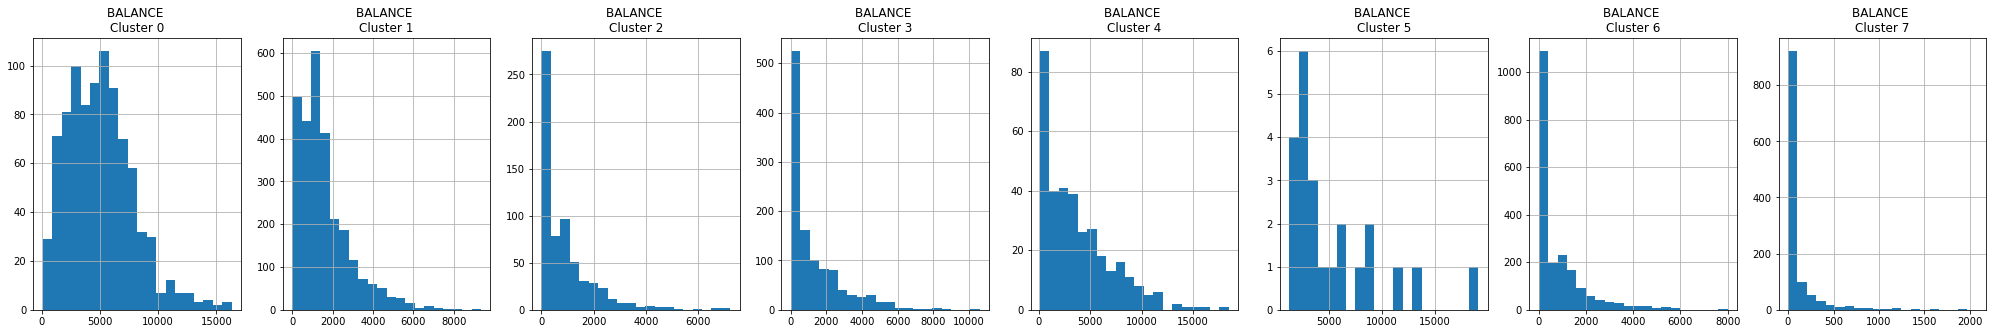

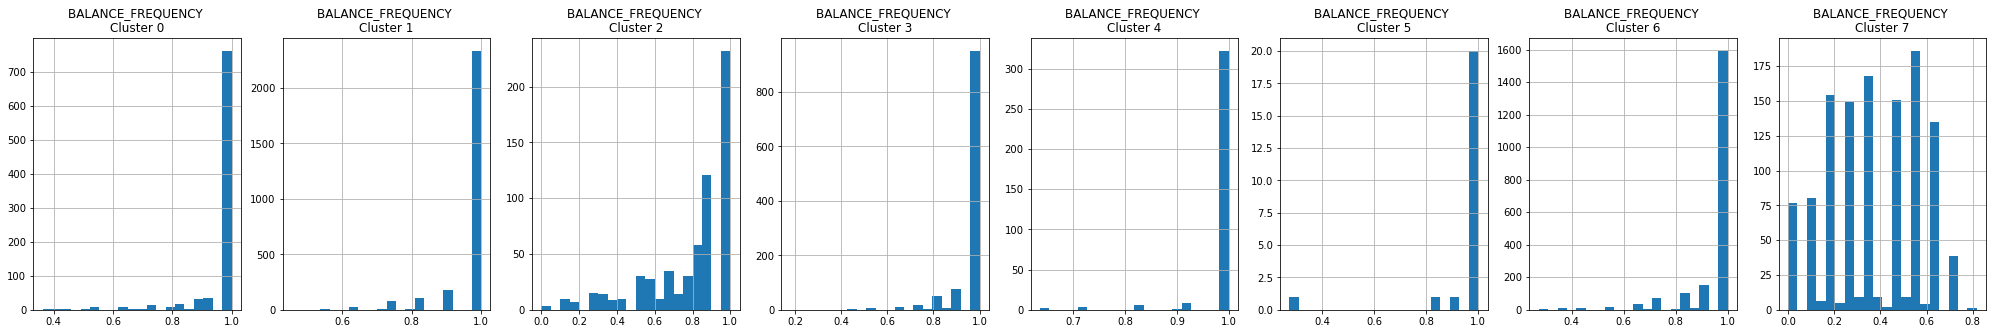

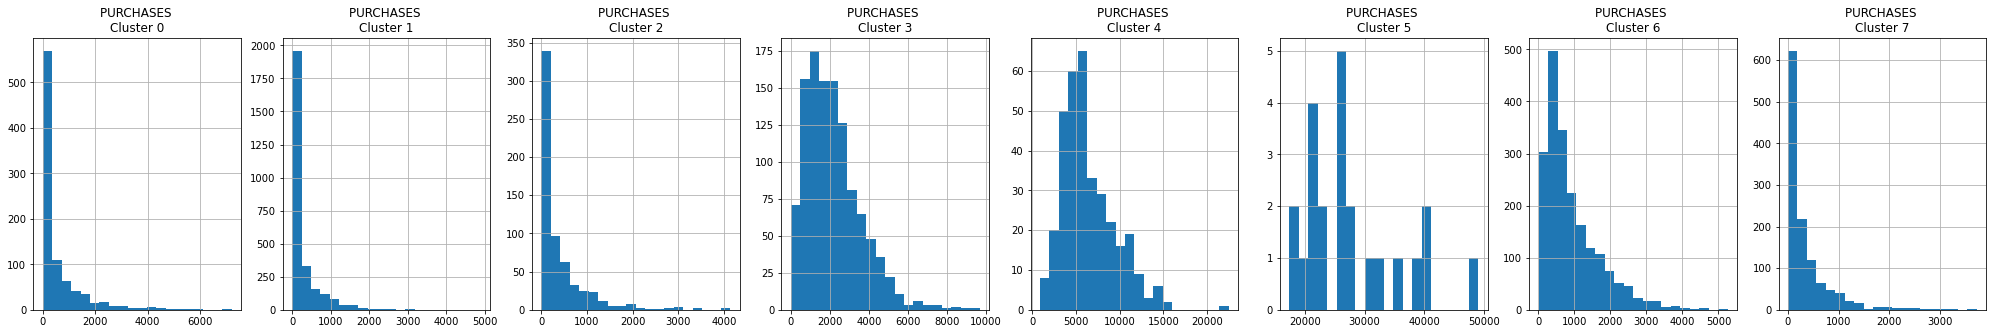

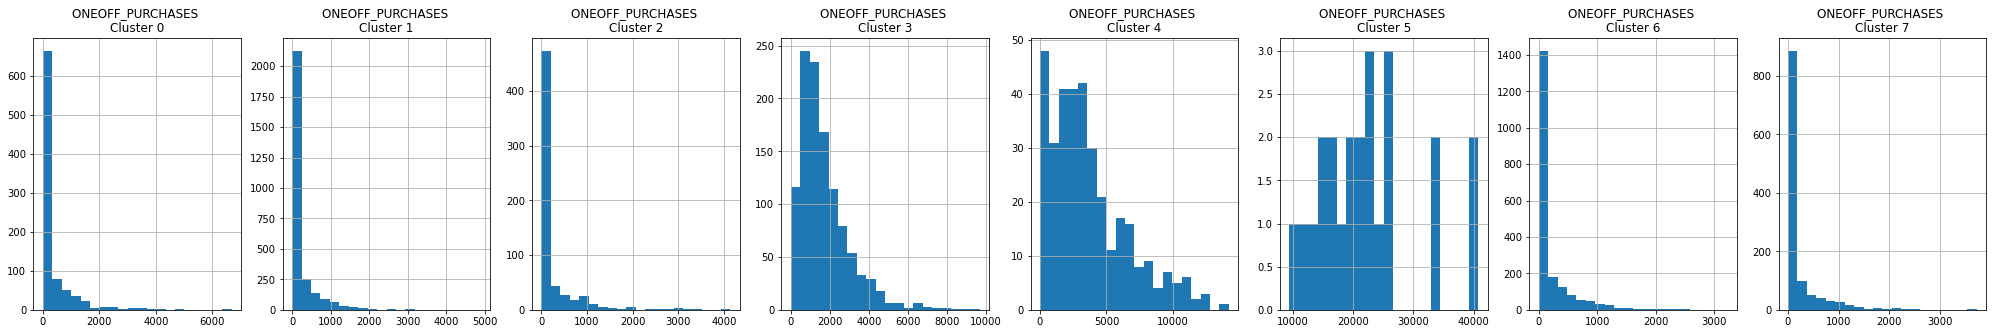

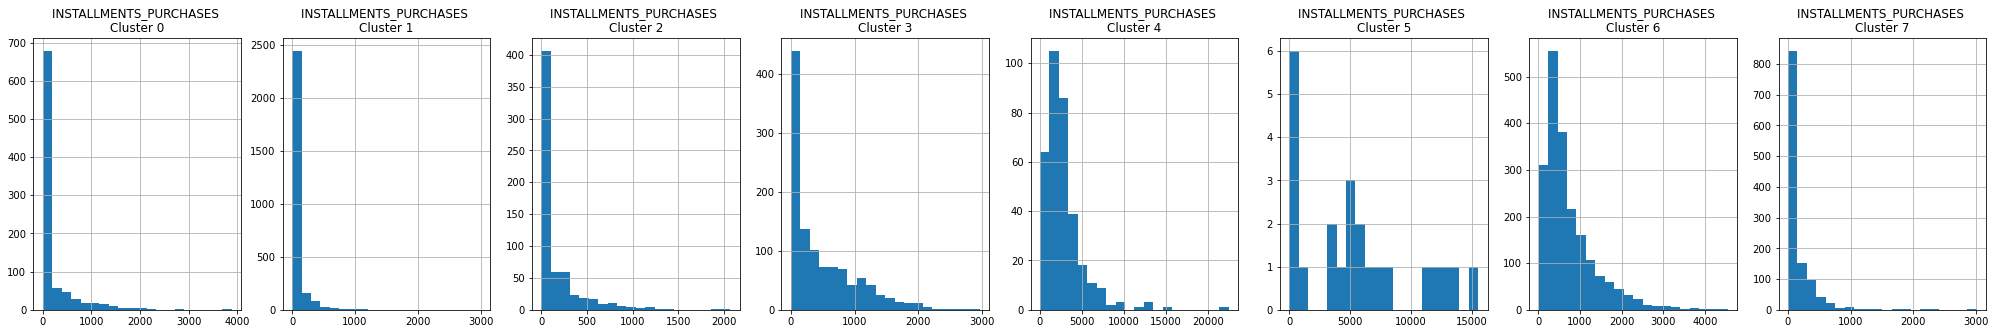

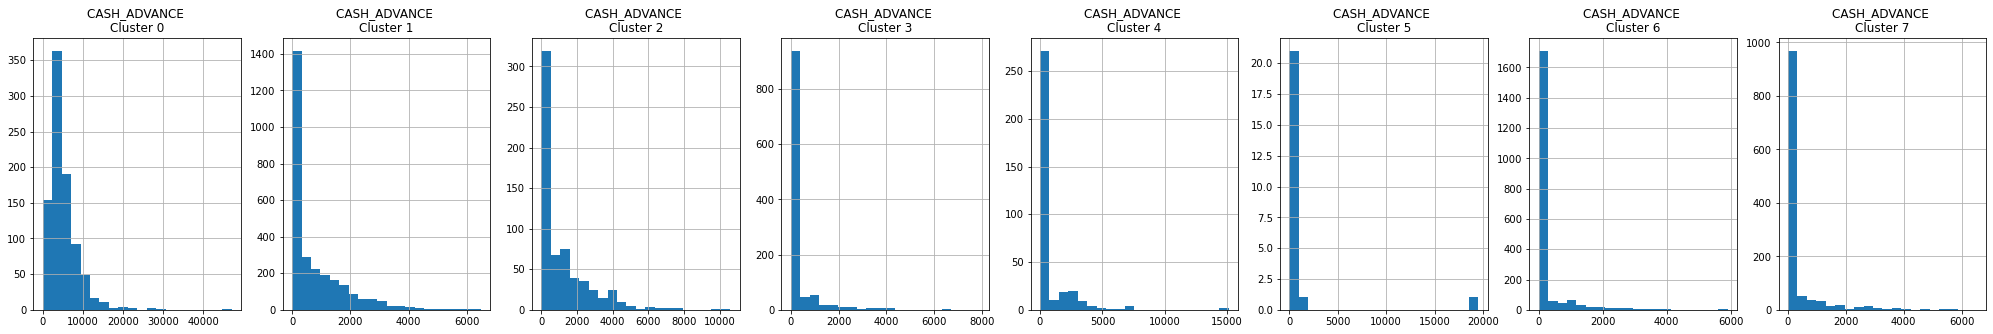

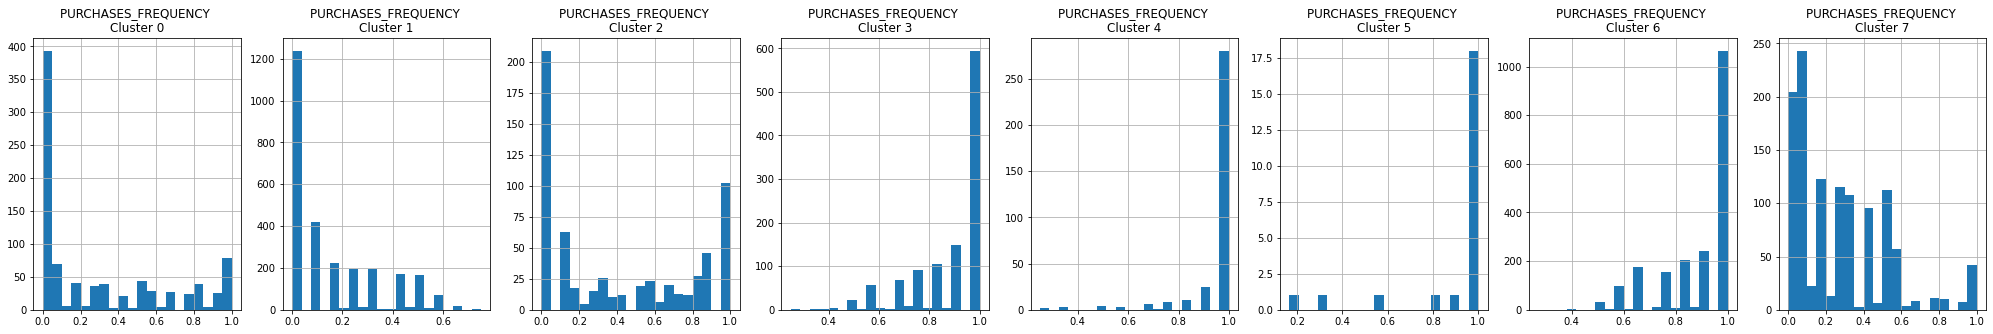

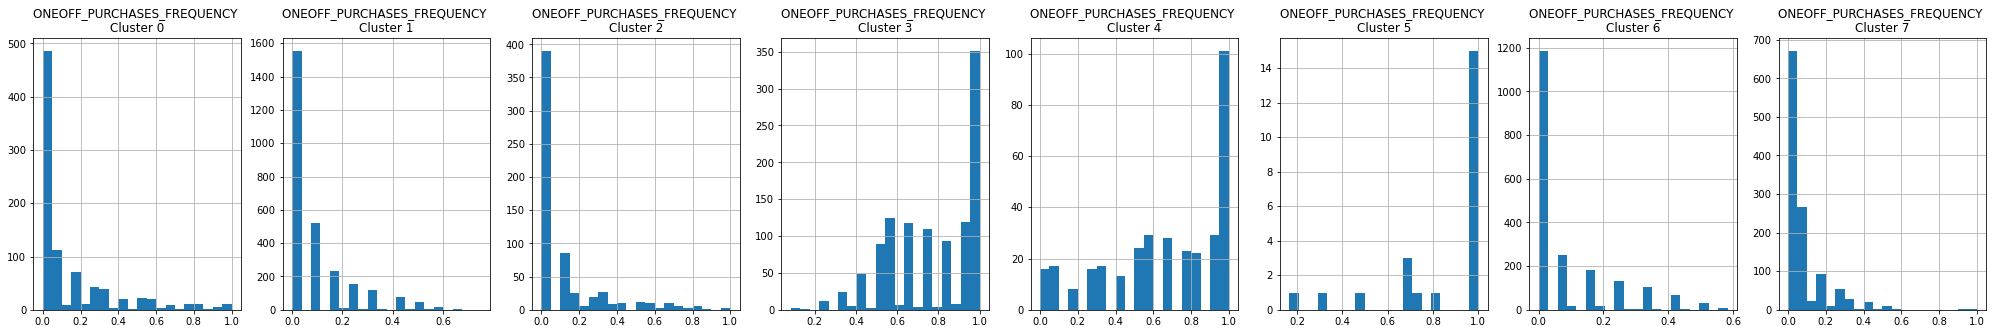

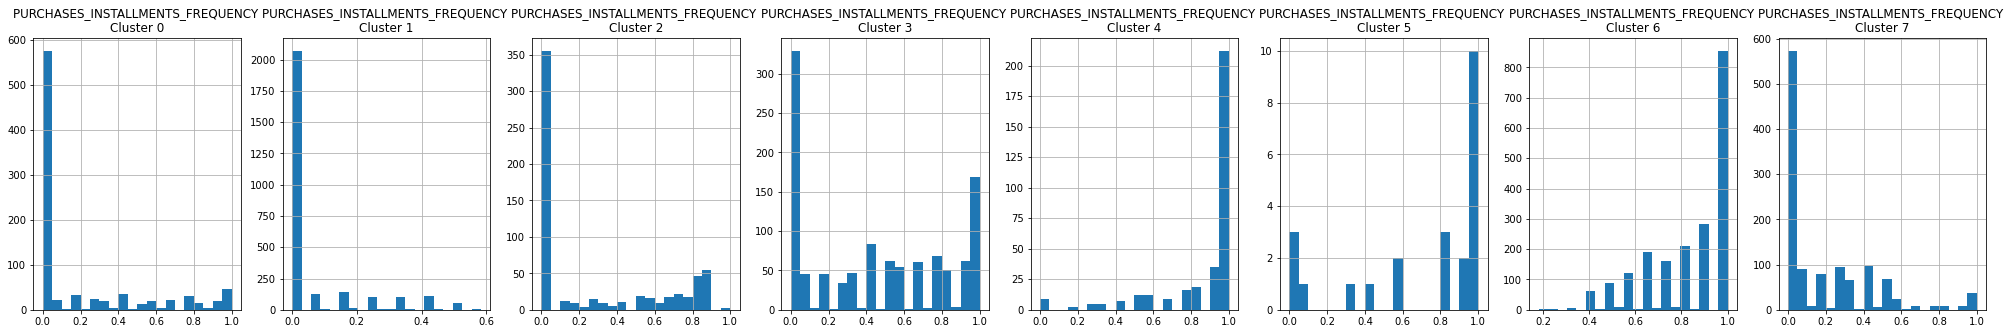

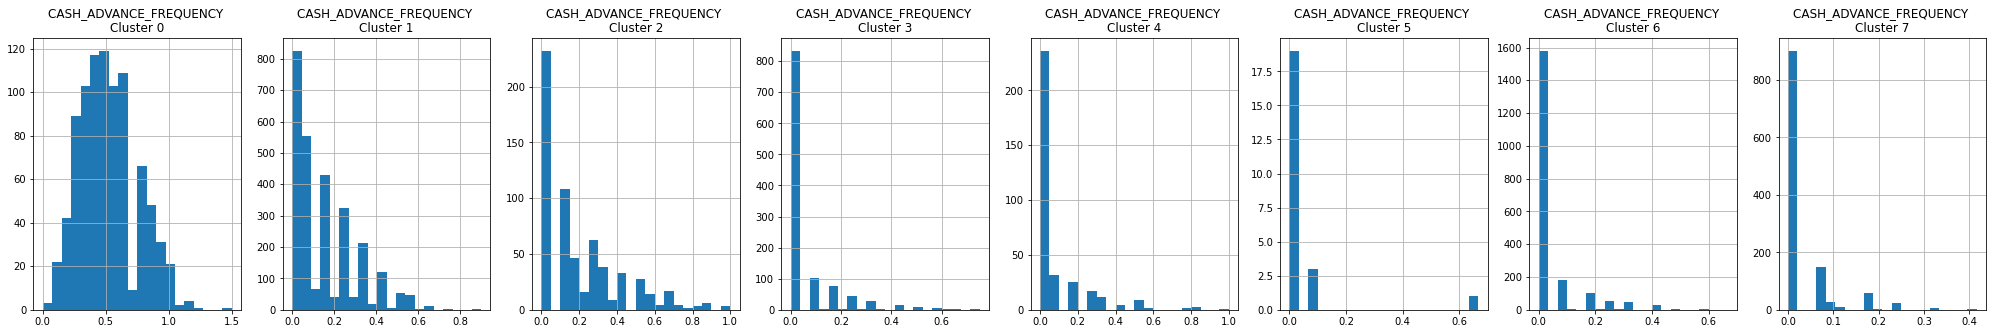

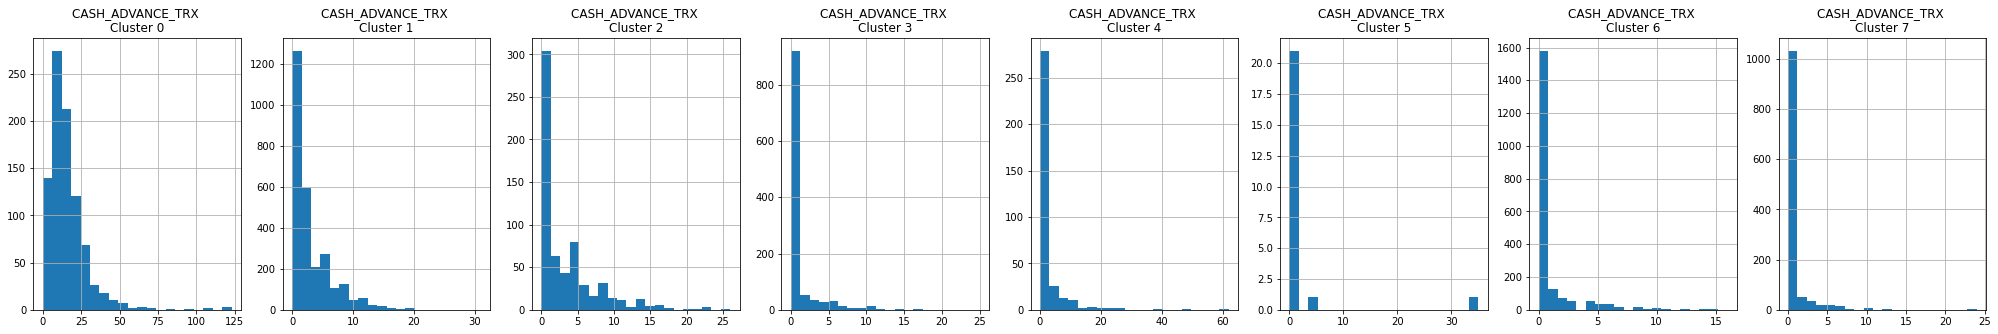

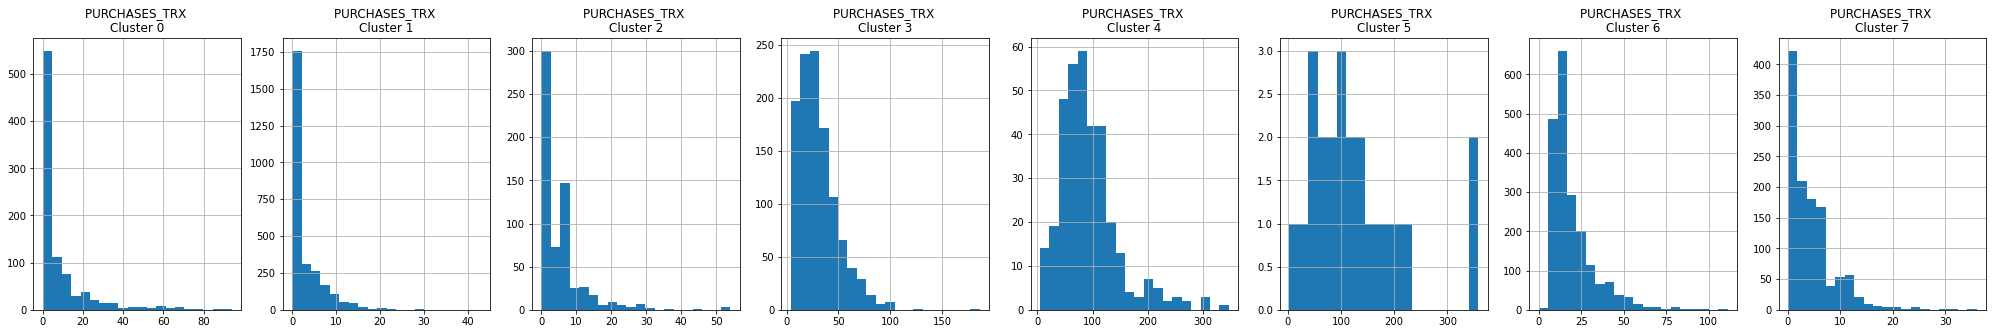

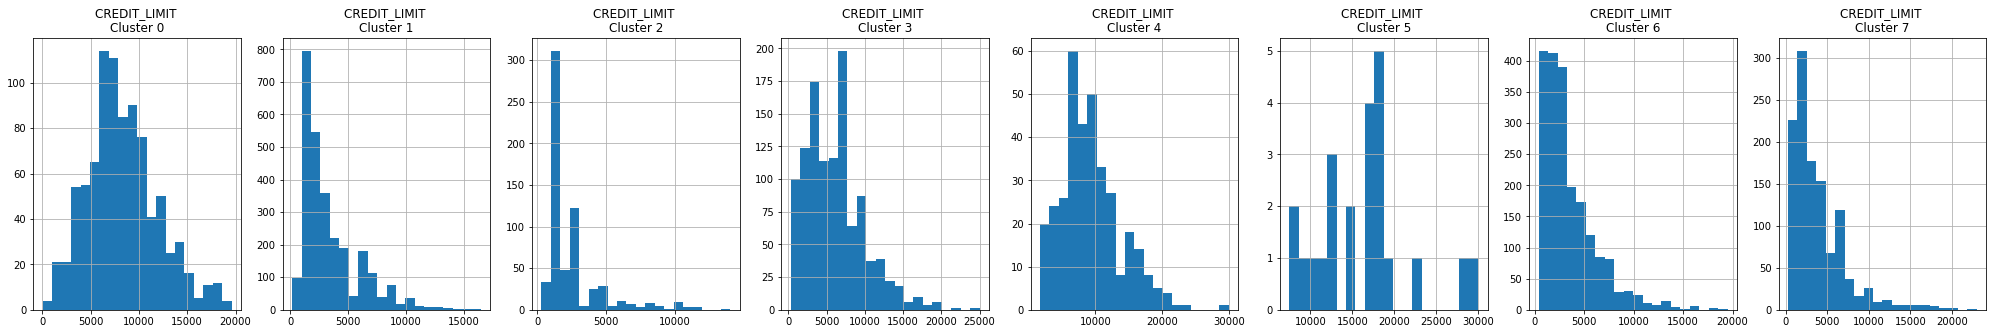

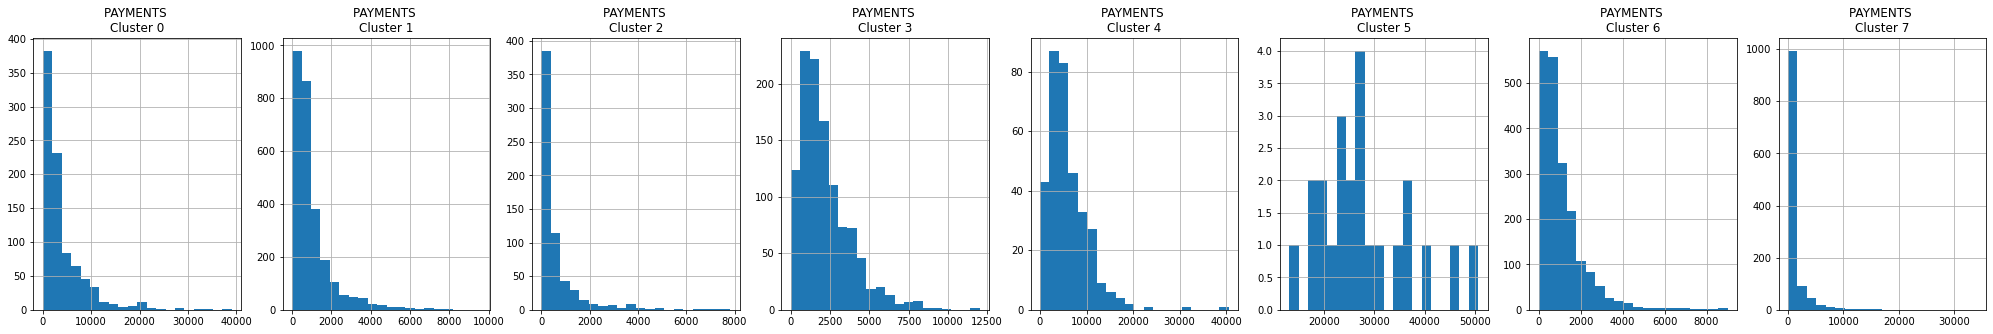

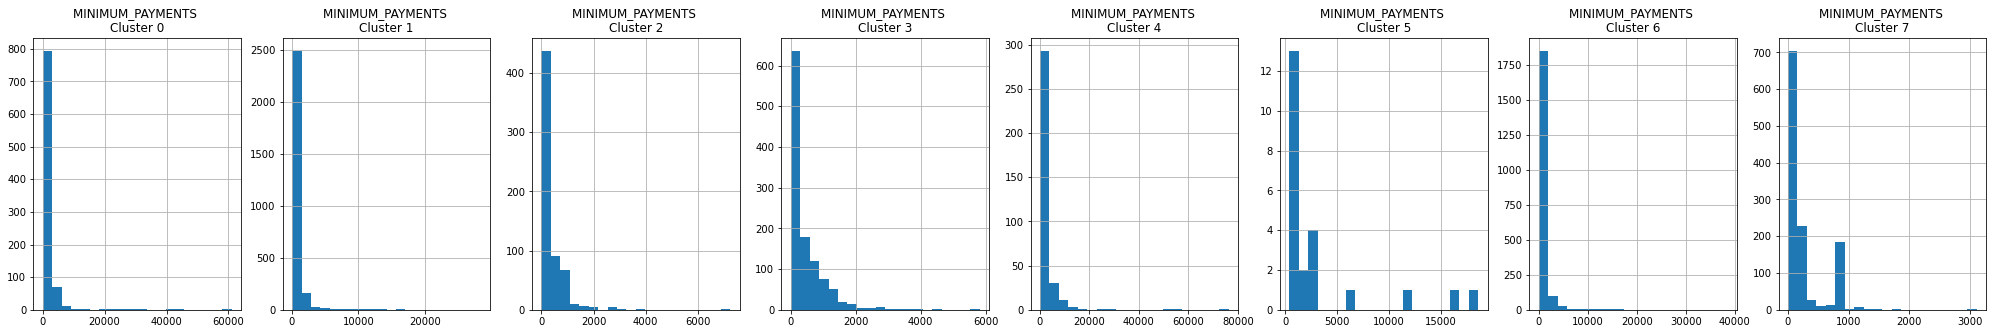

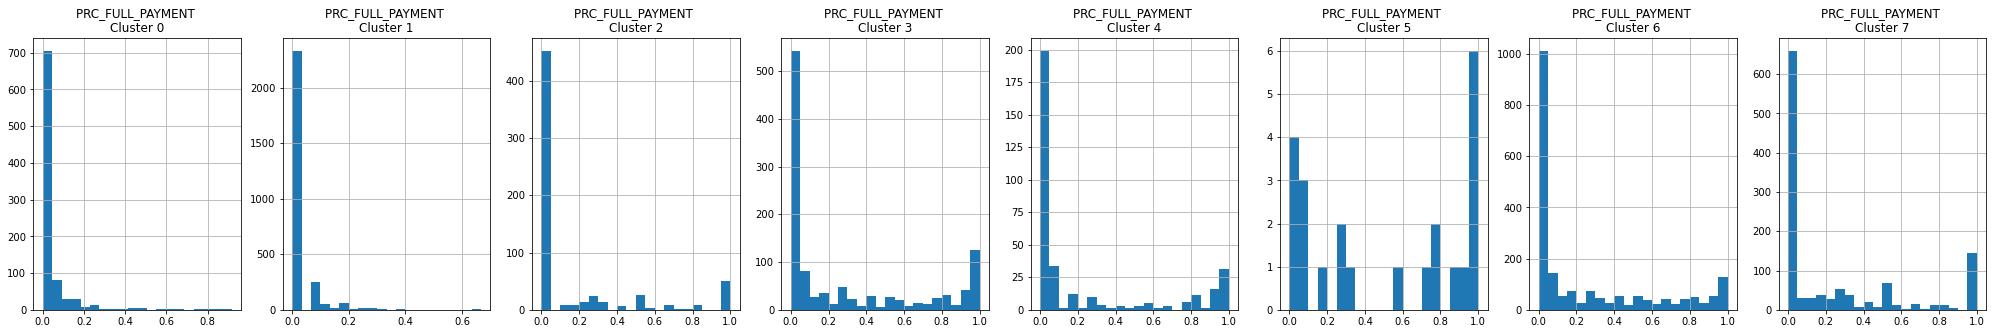

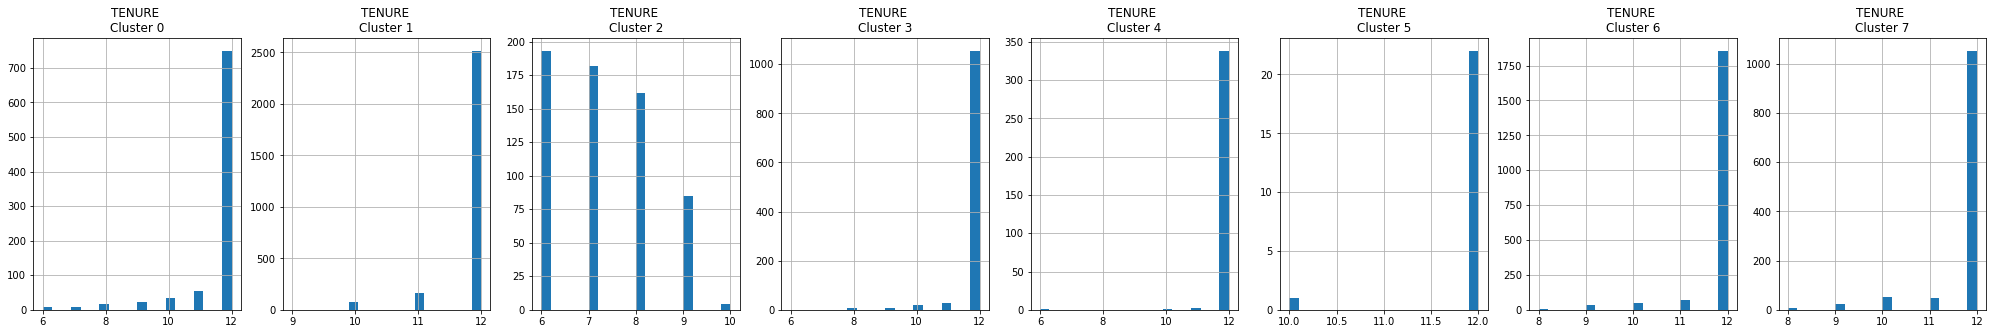

In [77]:
for i in credicard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = credicard_df_cluster[credicard_df_cluster['cluster'] == j]
        cluster[i].hist(bins =  20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [79]:
credit_ordered = credicard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6726,2303.266119,1.0,740.73,324.88,415.85,3521.638805,0.583333,0.250000,0.333333,0.750000,14,9,5000.0,3241.098168,701.198898,0.000000,12,0
6566,4661.423201,1.0,0.00,0.00,0.00,5263.831799,0.000000,0.000000,0.000000,0.583333,10,0,6500.0,2943.485063,1168.800699,0.000000,12,0
909,7427.807223,1.0,205.89,110.00,95.89,3697.222827,0.416667,0.083333,0.416667,0.666667,11,12,9500.0,2404.231683,2364.114477,0.000000,12,0
910,2746.923673,1.0,0.00,0.00,0.00,4289.506847,0.000000,0.000000,0.000000,0.333333,11,0,6500.0,2017.190799,622.503528,0.000000,12,0
6564,4218.956639,1.0,0.00,0.00,0.00,4734.304587,0.000000,0.000000,0.000000,0.583333,44,0,4500.0,5557.539676,1434.238518,0.083333,12,0


In [80]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4929,62.104602,0.636364,377.62,0.0,377.62,0.0,0.500000,0.000000,0.5,0.0,0,6,2500.0,548.900318,99.168927,0.181818,12,7
4930,56.945201,0.454545,328.10,328.1,0.00,0.0,0.166667,0.166667,0.0,0.0,0,4,6500.0,437.845434,117.947254,0.000000,12,7
4931,8.421315,0.272727,60.00,60.0,0.00,0.0,0.083333,0.083333,0.0,0.0,0,1,6000.0,250.155585,122.068140,0.000000,12,7
4933,44.613002,0.363636,281.70,281.7,0.00,0.0,0.083333,0.083333,0.0,0.0,0,2,7500.0,401.455848,75.081916,0.000000,12,7
2802,11.433400,0.090909,250.00,250.0,0.00,0.0,0.083333,0.083333,0.0,0.0,0,1,1800.0,1445.844749,84.417079,0.000000,12,7


In [81]:
credit_ordered.to_csv('cluster.csv')

Aplicação de PCA (Principal component analysis) e visualização dos resultados

In [82]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credicard_df_scaled)
principal_comp

array([[-1.68222012, -1.07645253],
       [-1.13829408,  2.50646602],
       [ 0.96968216, -0.38356308],
       ...,
       [-0.9262038 , -1.81078187],
       [-2.33655157, -0.65795028],
       [-0.55642294, -0.40047128]])

In [83]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138294,2.506466
2,0.969682,-0.383563
3,-0.873627,0.043165
4,-1.599434,-0.688581


In [85]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,1
1,-1.138294,2.506466,0
2,0.969682,-0.383563,3
3,-0.873627,0.043165,1
4,-1.599434,-0.688581,1


In [88]:
plt.figure(figsize=(10, 20))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pinks', 'yellow', 'gray', 'purple', 'black'])

ValueError: The palette list has the wrong number of colors.

<Figure size 720x1440 with 0 Axes>